In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/train_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DTronc       4412 non-null   float64
 1   LTronc       4412 non-null   float64
 2   DChar        4412 non-null   float64
 3   LChar        4409 non-null   float64
 4   DChar1       4046 non-null   float64
 5   LChar1       4172 non-null   object 
 6   DChar2       3033 non-null   object 
 7   LChar2       3136 non-null   float64
 8   DChar3       1905 non-null   float64
 9   LChar3       2019 non-null   float64
 10  DChar4       987 non-null    float64
 11  LChar4       1059 non-null   float64
 12  DChar5       603 non-null    float64
 13  LChar5       618 non-null    object 
 14  NumRam       4412 non-null   object 
 15  DRam         4403 non-null   object 
 16  LRam         4283 non-null   float64
 17  PFr1         3996 non-null   float64
 18  PFr2         3061 non-null   float64
 19  PFr3  

## Missing_values_table

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 26 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PFr6,4221,95.7
PFr5,4014,91.0
DChar5,3809,86.3
LChar5,3794,86.0
PFr4,3585,81.3
DChar4,3425,77.6
LChar4,3353,76.0
PFr3,2586,58.6
DChar3,2507,56.8
LChar3,2393,54.2


<Axes: >

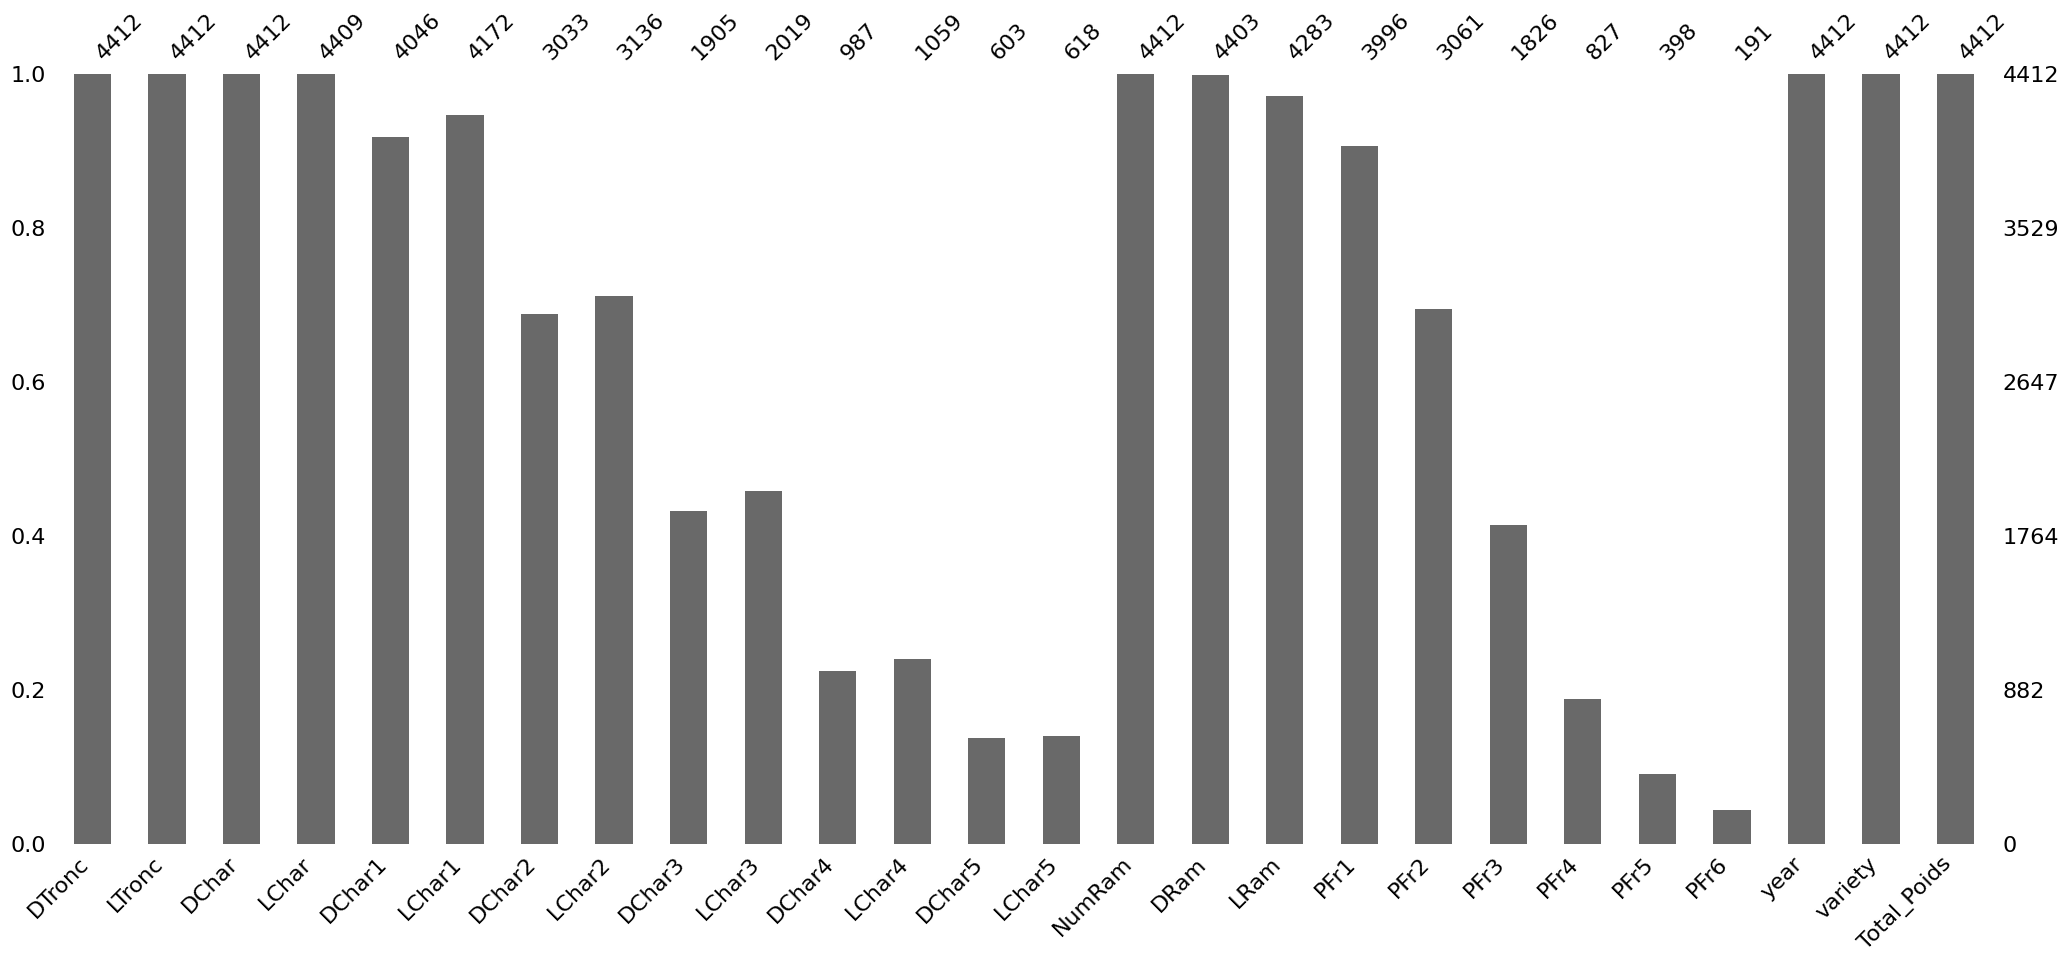

In [ ]:
import missingno as msno
msno.bar(df)

## Delete columns

In [ ]:
df.drop([ 'DChar5', 'LChar5','DChar4','LChar4','PFr1','PFr2','PFr3','PFr4','PFr5','PFr6'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DTronc       4412 non-null   float64
 1   LTronc       4412 non-null   float64
 2   DChar        4412 non-null   float64
 3   LChar        4409 non-null   float64
 4   DChar1       4046 non-null   float64
 5   LChar1       4172 non-null   object 
 6   DChar2       3033 non-null   object 
 7   LChar2       3136 non-null   float64
 8   DChar3       1905 non-null   float64
 9   LChar3       2019 non-null   float64
 10  NumRam       4412 non-null   object 
 11  DRam         4403 non-null   object 
 12  LRam         4283 non-null   float64
 13  year         4412 non-null   int64  
 14  variety      4412 non-null   int64  
 15  Total_Poids  4412 non-null   float64
dtypes: float64(10), int64(2), object(4)
memory usage: 551.6+ KB


In [ ]:
df

,DTronc,LTronc,DChar,LChar,DChar1,LChar1,DChar2,LChar2,DChar3,LChar3,NumRam,DRam,LRam,year,variety,Total_Poids
0,75.0,34.0,34.5,190.5,106.30,50,76.1,7.5,NaN,NaN,R 19,5,27.0,2022,2,170.0
1,75.0,34.0,34.5,188.0,66.80,0,NaN,NaN,NaN,NaN,R 11,5.4,24.0,2022,2,0.0
2,64.5,34.0,32.5,66.0,55.50,0,35,36.0,NaN,NaN,R21,17,17.0,2019,2,694.0
3,70.0,55.0,37.0,203.0,71.30,14.0,31.2,35.0,NaN,NaN,R65,5.6,47.0,2022,1,156.0
4,71.0,62.0,35.0,110.0,53.03,43.0,21.66,32.0,NaN,NaN,R36,6.03,25.0,2021,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,71.5,31.0,40.3,63.0,83.50,139,12.14,10.0,8.8,30.0,R80,3.3,11.5,2021,2,93.0
4408,81.0,14.0,37.0,263.0,54.80,3,27,4.0,NaN,NaN,R25,5.3,26.0,2022,2,280.0
4409,81.0,19.0,40.0,199.5,39.00,34,11.5,2.3,NaN,NaN,R60,7.4,50.0,2022,2,200.0
4410,66.0,22.5,34.0,127.0,40.00,79.2,NaN,NaN,NaN,NaN,R 83,7.6,57.5,2022,2,220.0


In [ ]:
df.columns

Index(['DTronc', 'LTronc', 'DChar', 'LChar', 'DChar1', 'LChar1', 'DChar2',
       'LChar2', 'DChar3', 'LChar3', 'NumRam', 'DRam', 'LRam', 'year',
       'variety', 'Total_Poids'],
      dtype='object')

## Start imputation

In [ ]:
import numpy as np
def convert_to_nan(x):
    try:
        return pd.to_numeric(x)
    except:
        return np.nan

In [ ]:
columns = [ 'DChar2','DChar1', 'LChar1', 'DRam']
for cl in columns:
    df[cl] = df[cl].apply(convert_to_nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DTronc       4412 non-null   float64
 1   LTronc       4412 non-null   float64
 2   DChar        4412 non-null   float64
 3   LChar        4409 non-null   float64
 4   DChar1       4046 non-null   float64
 5   LChar1       4171 non-null   float64
 6   DChar2       3032 non-null   float64
 7   LChar2       3136 non-null   float64
 8   DChar3       1905 non-null   float64
 9   LChar3       2019 non-null   float64
 10  NumRam       4412 non-null   object 
 11  DRam         4399 non-null   float64
 12  LRam         4283 non-null   float64
 13  year         4412 non-null   int64  
 14  variety      4412 non-null   int64  
 15  Total_Poids  4412 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 551.6+ KB


In [ ]:
df['NumRam'] = df['NumRam'].str.replace('R', '').astype(float)

In [ ]:
df['NumRam']

0       19.0
1       11.0
2       21.0
3       65.0
4       36.0
        ... 
4407    80.0
4408    25.0
4409    60.0
4410    83.0
4411    56.0
Name: NumRam, Length: 4412, dtype: float64

In [ ]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 16 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
DChar3,2507,56.8
LChar3,2393,54.2
DChar2,1380,31.3
LChar2,1276,28.9
DChar1,366,8.3
LChar1,241,5.5
LRam,129,2.9
DRam,13,0.3
LChar,3,0.1


In [ ]:
df_original=df.copy()

In [ ]:
df_mean=df.copy()

In [ ]:
df_median=df.copy()

In [ ]:
df_iter=df.copy()

In [ ]:
df_KNN=df.copy()

### **Simple** imputer :

1.   Mean




In [ ]:
from sklearn.impute import SimpleImputer

columns_with_missing = ['DChar3', 'LChar3', 'DChar2', 'LChar2', 'DChar1', 'LChar1', 'LRam', 'DRam', 'LChar']

imputer = SimpleImputer(strategy='mean')
df_mean[columns_with_missing] = imputer.fit_transform(df_mean[columns_with_missing])


In [ ]:
df_mean

,DTronc,LTronc,DChar,LChar,DChar1,LChar1,DChar2,LChar2,DChar3,LChar3,NumRam,DRam,LRam,year,variety,Total_Poids
0,75.0,34.0,34.5,190.5,106.30,50.0,76.100000,7.50000,27.482745,17.819257,19.0,5.00,27.0,2022,2,170.0
1,75.0,34.0,34.5,188.0,66.80,0.0,39.084268,26.12648,27.482745,17.819257,11.0,5.40,24.0,2022,2,0.0
2,64.5,34.0,32.5,66.0,55.50,0.0,35.000000,36.00000,27.482745,17.819257,21.0,17.00,17.0,2019,2,694.0
3,70.0,55.0,37.0,203.0,71.30,14.0,31.200000,35.00000,27.482745,17.819257,65.0,5.60,47.0,2022,1,156.0
4,71.0,62.0,35.0,110.0,53.03,43.0,21.660000,32.00000,27.482745,17.819257,36.0,6.03,25.0,2021,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,71.5,31.0,40.3,63.0,83.50,139.0,12.140000,10.00000,8.800000,30.000000,80.0,3.30,11.5,2021,2,93.0
4408,81.0,14.0,37.0,263.0,54.80,3.0,27.000000,4.00000,27.482745,17.819257,25.0,5.30,26.0,2022,2,280.0
4409,81.0,19.0,40.0,199.5,39.00,34.0,11.500000,2.30000,27.482745,17.819257,60.0,7.40,50.0,2022,2,200.0
4410,66.0,22.5,34.0,127.0,40.00,79.2,39.084268,26.12648,27.482745,17.819257,83.0,7.60,57.5,2022,2,220.0


In [ ]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DTronc       4412 non-null   float64
 1   LTronc       4412 non-null   float64
 2   DChar        4412 non-null   float64
 3   LChar        4412 non-null   float64
 4   DChar1       4412 non-null   float64
 5   LChar1       4412 non-null   float64
 6   DChar2       4412 non-null   float64
 7   LChar2       4412 non-null   float64
 8   DChar3       4412 non-null   float64
 9   LChar3       4412 non-null   float64
 10  NumRam       4412 non-null   float64
 11  DRam         4412 non-null   float64
 12  LRam         4412 non-null   float64
 13  year         4412 non-null   int64  
 14  variety      4412 non-null   int64  
 15  Total_Poids  4412 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 551.6 KB


In [ ]:
df_mean.shape

(4412, 16)

In [ ]:
df_original.shape

(4412, 16)

2.   Median



In [ ]:
from sklearn.impute import SimpleImputer


columns_with_missing = ['DChar3', 'LChar3', 'DChar2', 'LChar2', 'DChar1', 'LChar1', 'LRam', 'DRam', 'LChar']

# Impute missing values using SimpleImputer with the 'mean' strategy
imputer = SimpleImputer(strategy='median')
df_median[columns_with_missing] = imputer.fit_transform(df_median[columns_with_missing])


## iterative_imputer
    This method estimates missing values based on the relationships with other variables in the dataset.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def iterative_imputer(df):
    imputer = IterativeImputer()
    df_imputed = imputer.fit_transform(df)
    return pd.DataFrame(df_imputed, columns=df.columns)

df_iterative = iterative_imputer(df)

In [ ]:
df_iterative

,DTronc,LTronc,DChar,LChar,DChar1,LChar1,DChar2,LChar2,DChar3,LChar3,NumRam,DRam,LRam,year,variety,Total_Poids
0,75.0,34.0,34.5,190.5,106.30,50.0,76.100000,7.500000,38.067904,25.890994,19.0,5.00,27.0,2022.0,2.0,170.0
1,75.0,34.0,34.5,188.0,66.80,0.0,32.830536,28.962553,18.648639,16.663389,11.0,5.40,24.0,2022.0,2.0,0.0
2,64.5,34.0,32.5,66.0,55.50,0.0,35.000000,36.000000,20.308811,16.051584,21.0,17.00,17.0,2019.0,2.0,694.0
3,70.0,55.0,37.0,203.0,71.30,14.0,31.200000,35.000000,21.066799,13.914476,65.0,5.60,47.0,2022.0,1.0,156.0
4,71.0,62.0,35.0,110.0,53.03,43.0,21.660000,32.000000,15.584057,13.064242,36.0,6.03,25.0,2021.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,71.5,31.0,40.3,63.0,83.50,139.0,12.140000,10.000000,8.800000,30.000000,80.0,3.30,11.5,2021.0,2.0,93.0
4408,81.0,14.0,37.0,263.0,54.80,3.0,27.000000,4.000000,17.363674,18.204639,25.0,5.30,26.0,2022.0,2.0,280.0
4409,81.0,19.0,40.0,199.5,39.00,34.0,11.500000,2.300000,11.781980,14.909980,60.0,7.40,50.0,2022.0,2.0,200.0
4410,66.0,22.5,34.0,127.0,40.00,79.2,25.514021,25.736179,15.964411,13.952577,83.0,7.60,57.5,2022.0,2.0,220.0


In [ ]:
from sklearn.impute import KNNImputer

def knn_imputer(df):
    imputer = KNNImputer()
    df_imputed = imputer.fit_transform(df)
    return pd.DataFrame(df_imputed, columns=df.columns)

df_knn = knn_imputer(df)
df_knn

,DTronc,LTronc,DChar,LChar,DChar1,LChar1,DChar2,LChar2,DChar3,LChar3,NumRam,DRam,LRam,year,variety,Total_Poids
0,75.0,34.0,34.5,190.5,106.30,50.0,76.100,7.50,43.158,32.38,19.0,5.00,27.0,2022.0,2.0,170.0
1,75.0,34.0,34.5,188.0,66.80,0.0,41.614,53.02,27.114,25.74,11.0,5.40,24.0,2022.0,2.0,0.0
2,64.5,34.0,32.5,66.0,55.50,0.0,35.000,36.00,22.048,8.00,21.0,17.00,17.0,2019.0,2.0,694.0
3,70.0,55.0,37.0,203.0,71.30,14.0,31.200,35.00,11.406,12.04,65.0,5.60,47.0,2022.0,1.0,156.0
4,71.0,62.0,35.0,110.0,53.03,43.0,21.660,32.00,19.090,12.16,36.0,6.03,25.0,2021.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,71.5,31.0,40.3,63.0,83.50,139.0,12.140,10.00,8.800,30.00,80.0,3.30,11.5,2021.0,2.0,93.0
4408,81.0,14.0,37.0,263.0,54.80,3.0,27.000,4.00,26.092,23.20,25.0,5.30,26.0,2022.0,2.0,280.0
4409,81.0,19.0,40.0,199.5,39.00,34.0,11.500,2.30,18.102,24.60,60.0,7.40,50.0,2022.0,2.0,200.0
4410,66.0,22.5,34.0,127.0,40.00,79.2,30.698,29.02,44.460,28.60,83.0,7.60,57.5,2022.0,2.0,220.0


In [ ]:
mean_missing_percentage = df_mean[columns_with_missing].isnull().sum().sum() / (df_mean.shape[0] * len(columns_with_missing))
median_missing_percentage = df_median[columns_with_missing].isnull().sum().sum() / (df_median.shape[0] * len(columns_with_missing))
iterative_missing_percentage = df_iterative[columns_with_missing].isnull().sum().sum() / (df_iterative.shape[0] * len(columns_with_missing))
knn_missing_percentage = df_knn[columns_with_missing].isnull().sum().sum() / (df_knn.shape[0] * len(columns_with_missing))

# Print evaluation results
print("Mean Imputation - Missing Percentage: {:.2f}%".format(mean_missing_percentage * 100))
print("Median Imputation - Missing Percentage: {:.2f}%".format(median_missing_percentage * 100))
print("Iterative Imputation - Missing Percentage: {:.2f}%".format(iterative_missing_percentage * 100))
print("KNN Imputation - Missing Percentage: {:.2f}%".format(knn_missing_percentage * 100))


Mean Imputation - Missing Percentage: 0.00%
Median Imputation - Missing Percentage: 0.00%
Iterative Imputation - Missing Percentage: 0.00%
KNN Imputation - Missing Percentage: 0.00%


In [ ]:
df_median.to_csv("median.csv", index=False)

In [ ]:
df_iterative.to_csv("iter.csv", index=False)


In [ ]:
df_knn.to_csv("knnk.csv", index=False)